# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

1d54528d4bb3beecd81802b7ec3f3d12


## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#lists for data
temp = []
lat = []
lng = []
hum = []
cld = []
mxTmp = []
citNm = []
wnd = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(response['name']+ "  response number: " + str(len(citNm)))    
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        mxTmp.append(response['main']['temp_max'])
        citNm.append(response['name'])
        wnd.append(response['wind']['speed'])
    except:
        print("Not Found. Skipping")
        pass
    #add Rest
    
    time.sleep(0.2)



Te Anau  response number: 0
Novikovo  response number: 1
Rozivka  response number: 2
Kapaa  response number: 3
Maceió  response number: 4
Kruisfontein  response number: 5
Calabozo  response number: 6
Tuktoyaktuk  response number: 7
Bredasdorp  response number: 8
Hilo  response number: 9
Rikitea  response number: 10
Severo-Kuril'sk  response number: 11
East London  response number: 12
Ushuaia  response number: 13
Carnarvon  response number: 14
Ahero  response number: 15
Punta Arenas  response number: 16
Puerto Escondido  response number: 17
Dudinka  response number: 18
Hermanus  response number: 19
Tabas  response number: 20
Porto Recanati  response number: 21
Port Elizabeth  response number: 22
Not Found. Skipping
Mariehamn  response number: 23
Not Found. Skipping
Srandakan  response number: 24
Inta  response number: 25
Port Lincoln  response number: 26
Arraial do Cabo  response number: 27
Trairi  response number: 28
Saint-Philippe  response number: 29
Maibong  response number: 30
Chok

Nanortalik  response number: 247
Wajir  response number: 248
Casper  response number: 249
Agadez  response number: 250
Qasigiannguit  response number: 251
Salalah  response number: 252
Arrondissement de Saint-Denis  response number: 253
Honiara  response number: 254
Fare  response number: 255
Taoudenni  response number: 256
Gallup  response number: 257
Hay River  response number: 258
Chernivtsi  response number: 259
Valdivia  response number: 260
Santa Rita  response number: 261
Sinjai  response number: 262
Bhādra  response number: 263
Aksu  response number: 264
Not Found. Skipping
Ilulissat  response number: 265
Dali  response number: 266
Bobrovskiy  response number: 267
Buritis  response number: 268
Salinas  response number: 269
Natal  response number: 270
Yerbogachën  response number: 271
Oranjemund  response number: 272
Mafinga  response number: 273
Garoowe  response number: 274
Nishihara  response number: 275
Not Found. Skipping
Tual  response number: 276
Qandala  response number:

Quatre Cocos  response number: 496
Kieta  response number: 497
Abhā  response number: 498
Dustlik  response number: 499
Sorong  response number: 500
Acurenam  response number: 501
Okha  response number: 502
Chengde  response number: 503
Grand Gaube  response number: 504
Mhlume  response number: 505
Husavik  response number: 506
Ialibu  response number: 507
Campbell River  response number: 508
Saint Stephen  response number: 509
Alyangula  response number: 510
Lugus  response number: 511
Hualmay  response number: 512
Betong  response number: 513
Olafsvik  response number: 514
Remedios  response number: 515
Zhanakorgan  response number: 516
Safi  response number: 517
Ternate  response number: 518
Cayenne  response number: 519
Not Found. Skipping
Not Found. Skipping
Sajanan  response number: 520
Soni  response number: 521
Broome  response number: 522
Saint George  response number: 523
Ucluelet  response number: 524
Vuktyl  response number: 525
Phalodi  response number: 526
Myanaung  respo

In [52]:
# I made a disc tionary of lists containing al the collected data. 
dl = {"City Name": citNm,\
      "Temperature": temp,\
      "Maximum Temp": mxTmp,\
      "Wind": wnd,\
      "Cloudiness": cld,\
      'Latitude': lat,\
      'Longitude':lng,\
      'Humidity': hum}
#I then made that dictionary of lists into a Data Frame
df = pd.DataFrame(dl)
df.head()

    #print(json.dumps(response, indent=4, sort_keys=True)) 

,City Name,Temperature,Maximum Temp,Wind,Cloudiness,Latitude,Longitude,Humidity
0,Te Anau,9.56,9.56,0.19,39,-45.4167,167.7167,83
1,Novikovo,-10.45,-10.45,3.19,0,51.1537,37.8879,71
2,Rozivka,-5.45,-5.45,4.34,0,46.9385,35.7724,40
3,Kapaa,22.57,23.33,4.12,75,22.0752,-159.3190,88
4,Maceió,27.00,27.00,3.60,0,-9.6658,-35.7353,78


In [72]:
df.to_csv('../output_data/cities.csv', index = False)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
#No cities have a humidity above 100
df.sort_values(by=['Humidity'],  ascending=False)


,City Name,Temperature,Maximum Temp,Wind,Cloudiness,Latitude,Longitude,Humidity
510,Alyangula,23.00,23.00,3.68,63,-13.8483,136.4192,100
312,Kiryat Gat,16.20,17.22,0.89,100,31.6100,34.7642,100
459,Kloulklubed,24.00,24.00,5.88,75,7.0419,134.2556,100
347,Mount Isa,23.00,23.00,0.21,99,-20.7333,139.5000,100
183,Ostróda,2.44,5.56,6.17,90,53.6967,19.9649,100
...,...,...,...,...,...,...,...,...
397,Sokolo,25.51,25.51,6.55,13,14.7328,-6.1219,10
74,Meadow Lake,17.95,19.44,5.66,20,34.8014,-106.5436,9
175,Kayes,29.70,29.70,5.40,90,14.0000,-11.0000,8
289,Puerto Palomas,21.00,21.00,2.06,1,31.7667,-107.6167,8


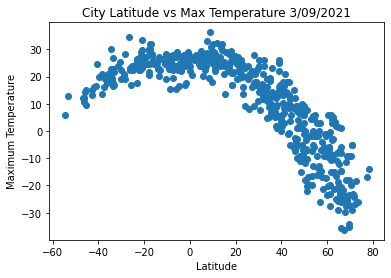

In [60]:
#This is a table of latitude vs Maximum Temp.
x_values = df['Latitude']
y_values = df['Maximum Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('City Latitude vs Max Temperature 3/09/2021')
plt.savefig('../output_data/City Latitude vs Max Temperature 3_09_2021.png')
plt.show()


In [ ]:
#Impression: There seems to be a fairly dense arc of plots on this scatter plot that maps max temp in 
#relation to Latitude.

## Latitude vs. Humidity Plot

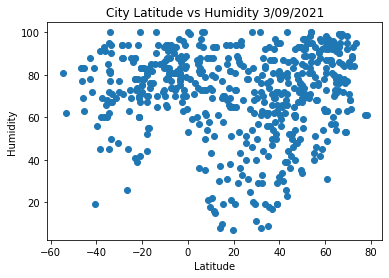

In [61]:
x_values = df['Latitude']
y_values = df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity 3/09/2021')
plt.savefig('../output_data/City Latitude vs Humidity 3_09_2021.png')
plt.show()


In [ ]:
#Impression: There seems to be cliusters but not much of an onvious trend in this scatter plot of Humidity vs Latitude.

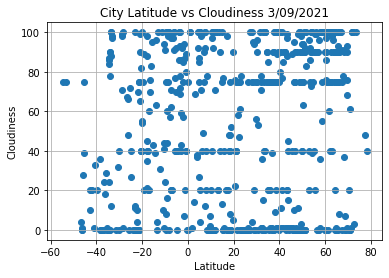

In [62]:
x_values = df['Latitude']
y_values = df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness 3/09/2021')
plt.grid(True)
plt.savefig('../output_data/City Latitude vs Cloudiness 3_09_2021.png')
plt.show()

In [ ]:
#Impression: There is clustering along the y axis as certain percentages of couldiness are common regardless 
# of Latitude. 

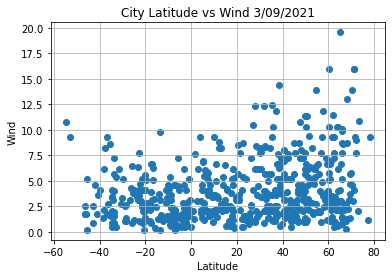

In [63]:
x_values = df['Latitude']
y_values = df['Wind']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title('City Latitude vs Wind 3/09/2021')
plt.grid(True)
plt.savefig('../output_data/City Latitude vs Wind 3_09_2021.png')
plt.show()

In [ ]:
#Impression: There is an inverse bell curve concerning wind speed suggesting that the most severe wind is to be found
# at the most extreme Latitudes.

## Linear Regression

In [ ]:
# I need two new data frames. One for the northern hemisphere and one for the southern hemisphere. 
ndf = df.loc[df["Latitude"] > 0]
sdf = df.loc[df["Latitude"] < 0]

R-Value-0.8979894380630556


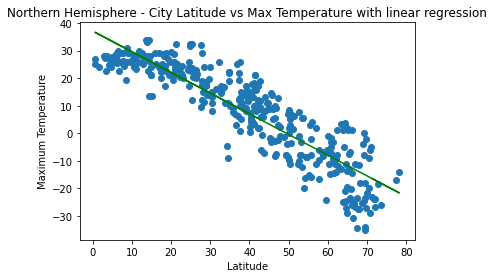

In [64]:
#stat scatterplot and establish values to get linear regressin.
x_values = ndf['Latitude']
y_values = ndf['Maximum Temp']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere - City Latitude vs Max Temperature with linear regression')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Northern Hemisphere - City Latitude vs Max Temperature with linear regression.png')
plt.show()

R-Value0.5697384526739677


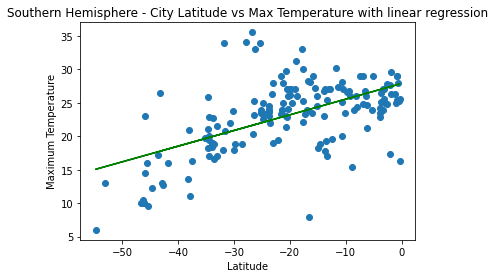

In [65]:
#stat scatterplot and establish values to get linear regressin.
x_values = sdf['Latitude']
y_values = sdf['Maximum Temp']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere - City Latitude vs Max Temperature with linear regression')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Southern Hemisphere - City Latitude vs Max Temperature with linear regression.png')
plt.show()

In [ ]:
#Impressions: Te northern hemisphere seems to have a much steeper slope of it's line and less spread from the line indicating
#higher corelation to latitude and temp when compared to the southern Hemisphere. 

R-Value0.22372716431480558


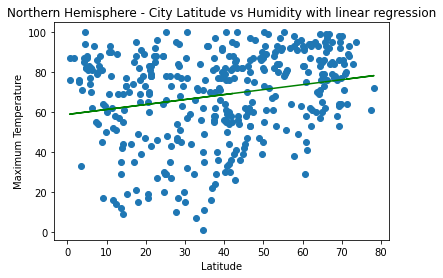

In [66]:
#stat scatterplot and establish values to get linear regressin.
x_values = ndf['Latitude']
y_values = ndf['Humidity']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere - City Latitude vs Humidity with linear regression')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Northern Hemisphere - City Latitude vs Humidity with linear regression.png')
plt.show()

R-Value0.16153259631770706


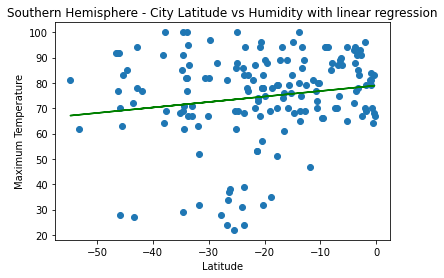

In [67]:
#stat scatterplot and establish values to get linear regressin.
x_values = sdf['Latitude']
y_values = sdf['Humidity']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere - City Latitude vs Humidity with linear regression')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Southern Hemisphere - City Latitude vs Humidity with linear regression.png')
plt.show()

In [ ]:
#Impression: Since the equater is represented by the right of the Northern Hemisphere scatter plot and the right 
# of the Southern Hemisphere scatterplot the lines are actually sloped in the opposite direction. There appears to be a
# low correlation though so the mildly apposing slopes seems to not be a very useful datum. 

R-Value0.10993449067371673


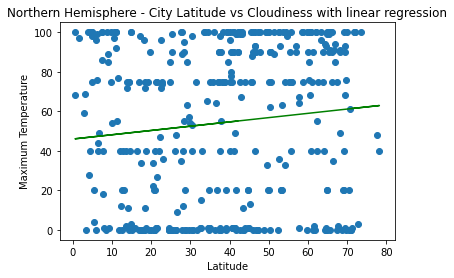

In [68]:
#stat scatterplot and establish values to get linear regressin.
x_values = ndf['Latitude']
y_values = ndf['Cloudiness']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere - City Latitude vs Cloudiness with linear regression')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Northern Hemisphere - City Latitude vs Cloudiness with linear regression.png')
plt.show()

R-Value0.26457598607236543
R-Value0.26457598607236543


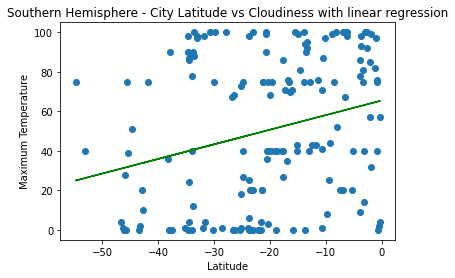

In [69]:
#stat scatterplot and establish values to get linear regressin.
x_values = sdf['Latitude']
y_values = sdf['Cloudiness']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere - City Latitude vs Cloudiness with linear regression')
print(f'R-Value{res.rvalue}')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Southern Hemisphere - City Latitude vs Cloudiness with linear regression.png')
plt.show()

In [ ]:
#again the slopes seem to be opposite of eachother but due to a 
# very low correlation there is very little useful information in these scatter plots.

R-Value0.12172891722312289


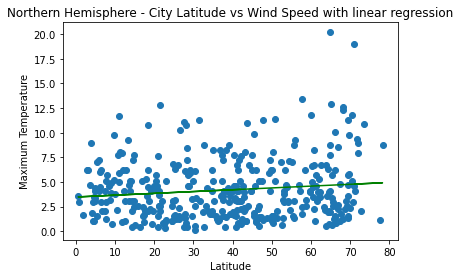

In [70]:
#stat scatterplot and establish values to get linear regressin.
x_values = ndf['Latitude']
y_values = ndf['Wind']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere - City Latitude vs Wind Speed with linear regression')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Northern Hemisphere - City Latitude vs Wind Speed with linear regression.png')
plt.show()

R-Value-0.2440357848759407


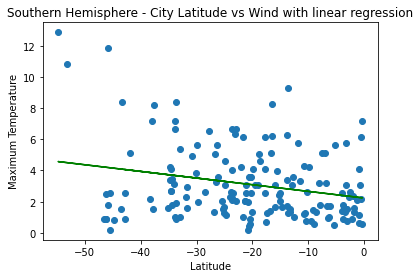

In [71]:
#stat scatterplot and establish values to get linear regressin.
x_values = sdf['Latitude']
y_values = sdf['Wind']
#calculate needed values for linear regression
res = linregress(x_values, y_values)
#Square r
rsqd = res.rvalue**2
#Plot Line on scatter plot
plt.plot(x_values, res.intercept + res.slope*x_values, 'g')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere - City Latitude vs Wind with linear regression')
print(f'R-Value{res.rvalue}')
plt.savefig('../output_data/Southern Hemisphere - City Latitude vs Wind Speed with linear regression.png')
plt.show()

In [ ]:
#Impressions: Although there is more of a slope in the Southern Hemisphere 
#scatterplot there seems to be little correlation between the two datums overall.